In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [13]:
news_df=pd.read_excel("C:/Users/user/Documents/uspd_AB.xls")

In [55]:
news_df['abstract'].str[0:20]

0       Semiconductor packag
1       Methods for driving 
2       Systems, apparatuses
3       Techniques for imple
4       Systems and methods 
                ...         
2995    A device such as a c
2996    Embodiments describe
2997    An integrated touchs
2998    In an embodiment, a 
2999    Embodiments of a Gen
Name: abstract, Length: 3000, dtype: object

In [14]:
# 특수 문자 제거
news_df['clean_doc'] = news_df['abstract'].str.replace("[^a-zA-Z]", " ") # 알파벳 아닌 문자 제거
# 길이가 3이하인 단어는 제거 (길이가 짧은 단어 제거)
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
# 전체 단어에 대한 소문자 변환
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

<ipython-input-14-afbdceea4ab6>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  news_df['clean_doc'] = news_df['abstract'].str.replace("[^a-zA-Z]", " ")


In [15]:
news_df

,abstract,clean_doc
0,Semiconductor packaging substrates and process...,semiconductor packaging substrates processing ...
1,Methods for driving a tunable laser with integ...,methods driving tunable laser with integrated ...
2,"Systems, apparatuses, and methods for placing ...",systems apparatuses methods placing cells inte...
3,Techniques for implementing and/or operating a...,techniques implementing operating radio freque...
4,Systems and methods for improving communicatio...,systems methods improving communication reliab...
...,...,...
2995,A device such as a computer stylus may have a ...,device such computer stylus have color sensor ...
2996,Embodiments described herein provide cryptogra...,embodiments described herein provide cryptogra...
2997,An integrated touchscreen can include light em...,integrated touchscreen include light emitting ...
2998,"In an embodiment, a processor comprises a rese...",embodiment processor comprises reservation sta...


In [56]:
# NLTK로부터 불용어를 받아온다.
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
stop_words = stopwords.words('english')
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split()) # 토큰화
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
# 불용어를 제거합니다.

In [20]:
print(tokenized_doc[1])

['methods', 'driving', 'tunable', 'laser', 'integrated', 'tuning', 'elements', 'disclosed', 'methods', 'include', 'modulating', 'tuning', 'current', 'laser', 'injection', 'current', 'laser', 'emission', 'wavelength', 'output', 'power', 'independently', 'controllable', 'examples', 'tuning', 'current', 'laser', 'injection', 'current', 'modulated', 'simultaneously', 'wider', 'tuning', 'range', 'result', 'examples', 'currents', 'sinusoidally', 'modulated', 'examples', 'constant', 'output', 'power', 'achieved', 'tuning', 'emission', 'wavelength', 'examples', 'output', 'power', 'tuning', 'follow', 'linear', 'relationship', 'examples', 'injection', 'current', 'tuning', 'element', 'drive', 'waveforms', 'necessary', 'achieve', 'targeted', 'output', 'power', 'tuning', 'waveforms', 'achieved', 'optimization', 'based', 'goodness', 'values', 'targeted', 'actual', 'output', 'power', 'tuning', 'waveforms']


In [21]:
detokenized_doc = []
for i in range(len(news_df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

news_df['clean_doc'] = detokenized_doc

In [57]:
vectorizer = TfidfVectorizer(stop_words='english', max_features= 10000, # 상위 10,000개의 단어를 보존 
max_df = 0.5, smooth_idf=True)

X = vectorizer.fit_transform(news_df['clean_doc'])

# TF-IDF 행렬의 크기 확인
print('TF-IDF 행렬의 크기 :',X.shape)

TF-IDF 행렬의 크기 : (3000, 5954)


### Topic modeling

In [77]:
svd_model = TruncatedSVD(n_components=100, algorithm='randomized', n_iter=100, random_state=122)
lsa_top=svd_model.fit(X)
#len(svd_model.components_)

In [78]:
var_explained = svd_model.explained_variance_ratio_.sum()

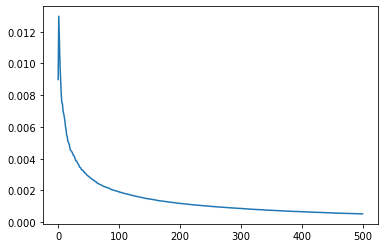

In [76]:
import matplotlib.pyplot as plt
plt.plot(svd_model.explained_variance_ratio_)

In [79]:
var_explained

0.3693942386944327

In [80]:
np.shape(svd_model.components_)

(100, 5954)

In [81]:
print(lsa_top)

TruncatedSVD(n_components=100, n_iter=100, random_state=122)


In [82]:
print(svd_model.components_.shape) # (no_of_topics*no_of_words)

(100, 5954)


In [83]:
svd_model.components_[0] # VT(topic-term similarity)

array([7.66767743e-05, 1.93055242e-03, 3.69579416e-04, ...,
       3.04930081e-03, 2.87004000e-03, 1.62049975e-04])

In [84]:
terms = vectorizer.get_feature_names() # 단어 집합. 1,000개의 단어가 저장됨.

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(svd_model.components_,terms)

Topic 1: [('user', 0.36381), ('input', 0.24497), ('interface', 0.24328), ('electronic', 0.23979), ('second', 0.22173)]
Topic 2: [('circuit', 0.26175), ('power', 0.22697), ('image', 0.21276), ('light', 0.21154), ('data', 0.20274)]
Topic 3: [('interfaces', 0.31856), ('embodiments', 0.21142), ('described', 0.16334), ('managing', 0.16032), ('exemplary', 0.15296)]
Topic 4: [('power', 0.23307), ('input', 0.20208), ('circuit', 0.1913), ('signal', 0.13563), ('node', 0.12917)]
Topic 5: [('power', 0.32622), ('interface', 0.17644), ('touch', 0.16784), ('user', 0.16218), ('interfaces', 0.15453)]
Topic 6: [('media', 0.49772), ('playback', 0.25346), ('power', 0.22552), ('display', 0.1606), ('item', 0.15366)]
Topic 7: [('audio', 0.49161), ('electronic', 0.36711), ('output', 0.20449), ('second', 0.16603), ('input', 0.13768)]
Topic 8: [('content', 0.5085), ('electronic', 0.31232), ('embodiments', 0.27008), ('presents', 0.20808), ('wireless', 0.14409)]
Topic 9: [('camera', 0.277), ('lens', 0.26939), ('p

In [86]:
# Create a function
def select_n_components(var_ratio, goal_var: float) -> int:
    # Set initial variance explained so far
    total_variance = 0.0
    
    # Set initial number of features
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        
        # Add the explained variance to the total
        total_variance += explained_variance
        
        # Add one to the number of components
        n_components += 1
        
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break
            
    # Return the number of components
    return n_components